# Creating A Insightful Analysis from Kaggle Dataset about *Marvel Comic Characters*.
---
Importing Necessary Libraries to Complete this task
1. Pandas - To manage and manipulate the dataset
2. MatplotLib - **Basic Plotting** - Line plots, scatter plots, bar plots, histograms, etc.
3. Seaborn - **Statistical Plots** - Automatically handles many details for creating complex visualizations like violin plots, box plots, and heatmaps.

In [1]:
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

Reading the Dataset through pandas library with the help of function `read_csv(file_path)` 

In [2]:
file_path = "C:\\Users\\arvin\\OneDrive\\Documents\\GitHub\\Kaggle-Learn\\Data Visualization\\marvel-wikia-data.csv"
my_data = pd.read_csv(file_path)

Since the actual dataset is too large, we are analysing only on first 1000 entries of dataset

In [3]:
my_data = my_data.head(5000)

In [17]:
my_data.head()

,page_id,name,urlslug,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,Year
0,1678,Spider-Man (Peter Parker),\/Spider-Man_(Peter_Parker),Secret Identity,Good Characters,Hazel Eyes,Brown Hair,Male Characters,NaN,Living Characters,4043.0,Aug-62,1962.0
1,7139,Captain America (Steven Rogers),\/Captain_America_(Steven_Rogers),Public Identity,Good Characters,Blue Eyes,White Hair,Male Characters,NaN,Living Characters,3360.0,Mar-41,1941.0
2,64786,"Wolverine (James \""Logan\"" Howlett)",\/Wolverine_(James_%22Logan%22_Howlett),Public Identity,Neutral Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,3061.0,Oct-74,1974.0
3,1868,"Iron Man (Anthony \""Tony\"" Stark)",\/Iron_Man_(Anthony_%22Tony%22_Stark),Public Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,2961.0,Mar-63,1963.0
4,2460,Thor (Thor Odinson),\/Thor_(Thor_Odinson),No Dual Identity,Good Characters,Blue Eyes,Blond Hair,Male Characters,NaN,Living Characters,2258.0,Nov-50,1950.0


### 1. **Distribution of Characters by Alignment and Sex**
   * **Plot Type**: Bar Plot
   * **Features**: `ALIGN` `SEX`
   * **Insight**: Understand the distribution of characters based on their alignment (Good, Bad, Neutral), differentiated by sex (Male, Female, etc.).

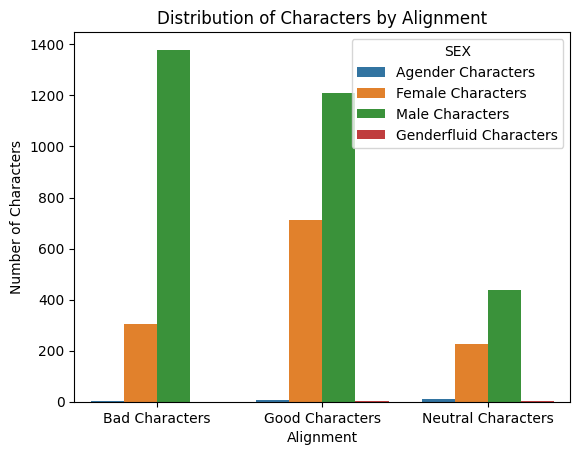

In [5]:
alignment_counts = my_data['ALIGN'].value_counts()
alignment_sex_counts = my_data.groupby(['ALIGN', 'SEX']).size().reset_index(name='counts')
sns.barplot(x='ALIGN', y='counts', hue='SEX', data=alignment_sex_counts)
plt.title('Distribution of Characters by Alignment')
plt.xlabel('Alignment')
plt.ylabel('Number of Characters')
plt.show()

### 2. **Gender Distribution of Characters**
   * **Plot Type**: Pie Chart or Bar Plot
   * **Features**: `SEX`
   * **Insight**: Visualize the gender distribution among comic characters.

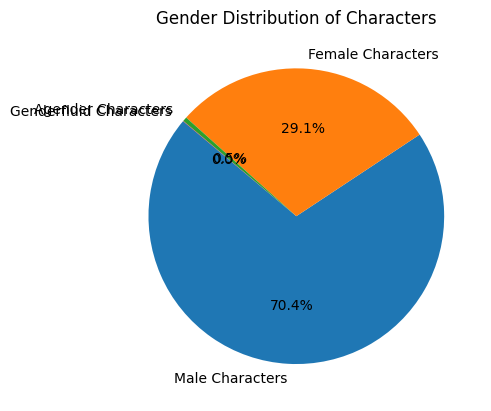

In [19]:
gender_counts = my_data['SEX'].value_counts()
gender_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Gender Distribution of Characters')
plt.ylabel('')
plt.show()

### 3. **Number of Appearances by Year** 
   * **Plot Type**: Line Plot 
   * **Features**: `Year`, `APPEARANCES` 
   * **Insight**: Track how the number of character appearances has changed over time.

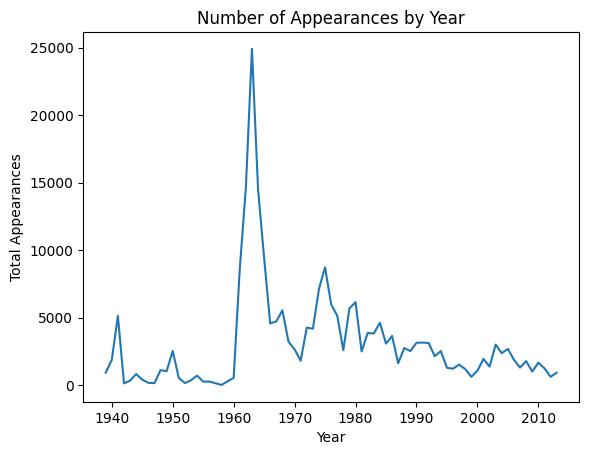

In [20]:
appearances_by_year = my_data.groupby('Year')['APPEARANCES'].sum().reset_index()
sns.lineplot(data=appearances_by_year, x='Year', y='APPEARANCES')
plt.title('Number of Appearances by Year')
plt.xlabel('Year')
plt.ylabel('Total Appearances')
plt.show()

### 4. **Character Appearances by Alignment** 
   * **Plot Type**: Box Plot 
   * **Features**: `ALIGN`, `APPEARANCES` 
   * **Insight**: Compare the number of appearances across different alignments.

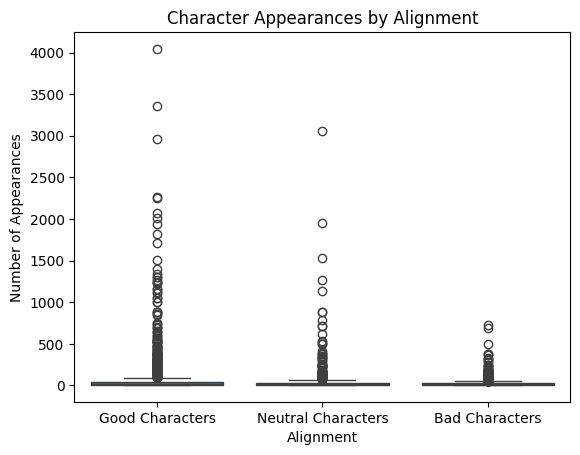

In [21]:
sns.boxplot(data=my_data, x='ALIGN', y='APPEARANCES')
plt.title('Character Appearances by Alignment')
plt.xlabel('Alignment')
plt.ylabel('Number of Appearances')
plt.show()


### 5. **Proportion of Living Characters by Alignment** 
   * **Plot Type**: Stacked Bar Plot 
   * **Features**: `ALIGN`, `ALIVE` 
   * **Insight**: See the proportion of living and deceased characters across different alignments.

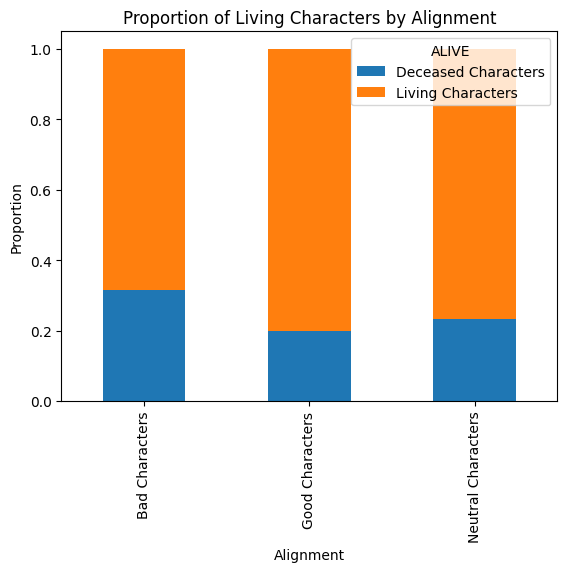

In [22]:
alive_alignment = pd.crosstab(my_data['ALIGN'], my_data['ALIVE'])
alive_alignment.div(alive_alignment.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Proportion of Living Characters by Alignment')
plt.xlabel('Alignment')
plt.ylabel('Proportion')
plt.show()


### 6\. **Character Appearances by Gender and Alignment** 
   * **Plot Type**: Grouped Bar Plot 
   * **Features**: `SEX`, `ALIGN`, `APPEARANCES` 
   * **Insight**: Examine the number of appearances based on both gender and alignment.

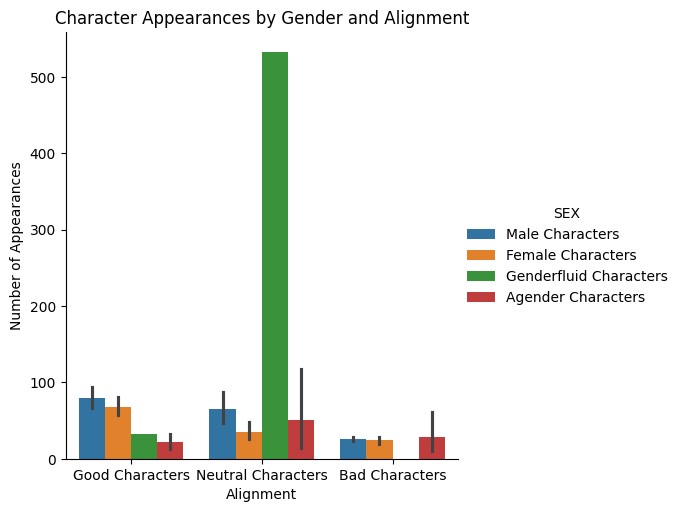

In [23]:
sns.catplot(data=my_data, x='ALIGN', y='APPEARANCES', hue='SEX', kind='bar')
plt.title('Character Appearances by Gender and Alignment')
plt.xlabel('Alignment')
plt.ylabel('Number of Appearances')
plt.show()


### 7\. **Hair and Eye Color Distribution** 
   * **Plot Type**: Count Plot 
   * **Features**: `HAIR`, `EYE` 
   * **Insight**: Visualize the distribution of hair and eye colors among characters.

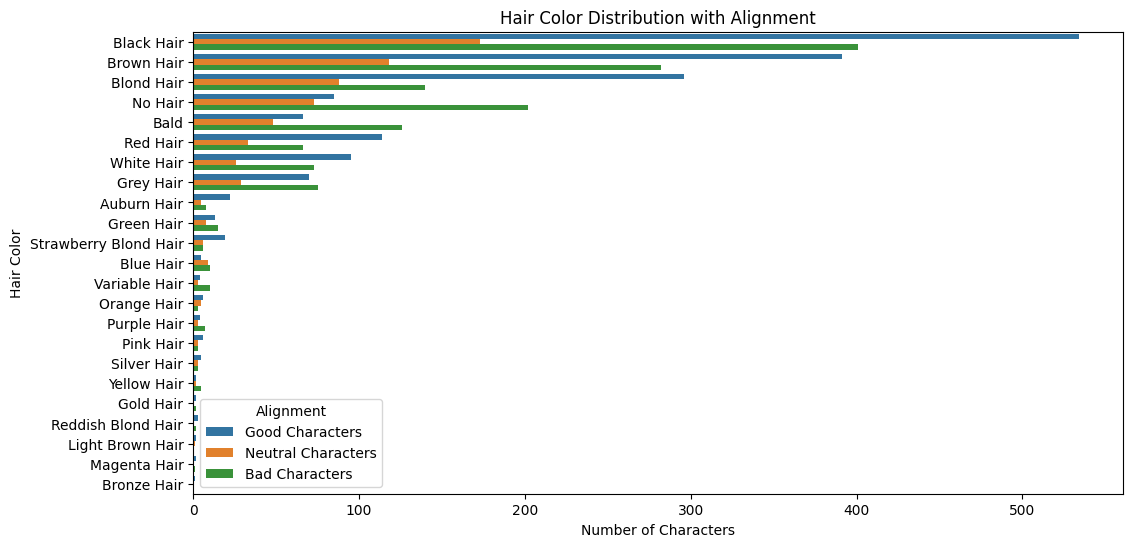

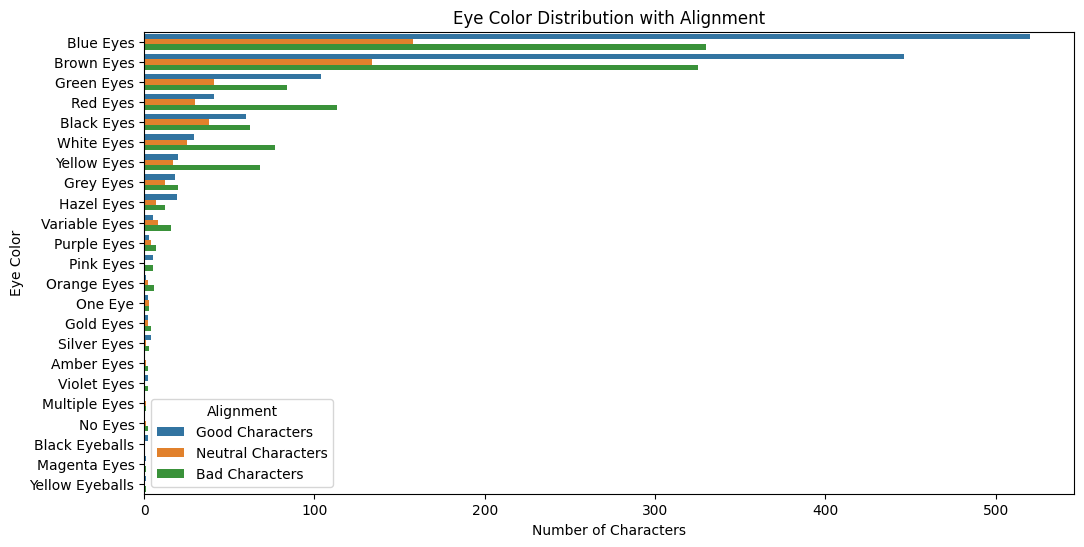

In [26]:
# Plot Hair Color Distribution with Alignment
plt.figure(figsize=(12, 6))
hair_color_order = my_data['HAIR'].value_counts().index
sns.countplot(data=my_data, y='HAIR', hue='ALIGN', order=hair_color_order)
plt.title('Hair Color Distribution with Alignment')
plt.xlabel('Number of Characters')
plt.ylabel('Hair Color')
plt.legend(title='Alignment')
plt.show()

# Plot Eye Color Distribution with Alignment
plt.figure(figsize=(12, 6))
eye_color_order = my_data['EYE'].value_counts().index
sns.countplot(data=my_data, y='EYE', hue='ALIGN', order=eye_color_order)
plt.title('Eye Color Distribution with Alignment')
plt.xlabel('Number of Characters')
plt.ylabel('Eye Color')
plt.legend(title='Alignment')
plt.show()

### 8\. **First Appearance Year Distribution** 
   * **Plot Type**: Histogram 
   * **Features**: `Year` `ALIGN`
   * **Insight**: Discover the distribution of first appearance years of characters, categorized by their alignment (e.g., superhero, villain).

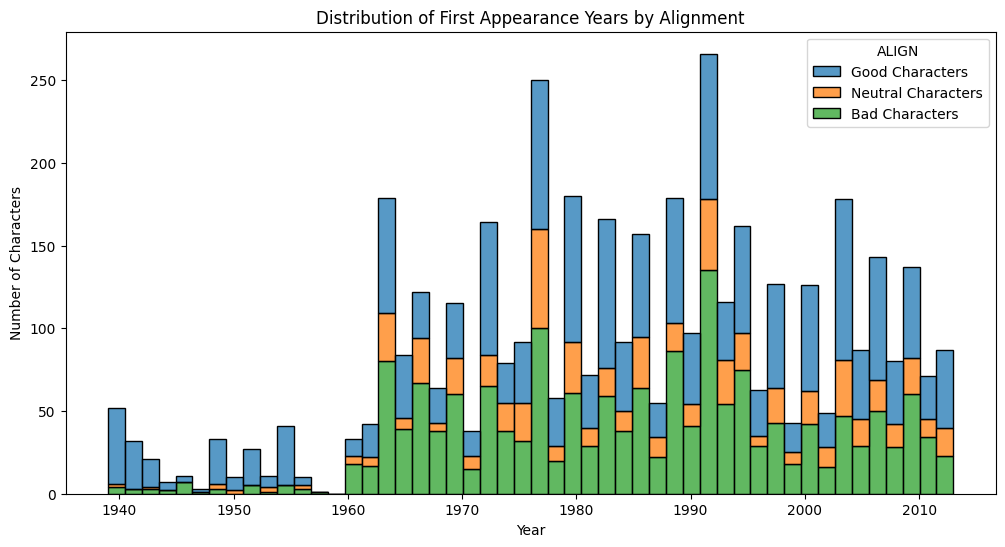

In [27]:
plt.figure(figsize=(12, 6))
sns.histplot(data=my_data, x='Year', hue='ALIGN', multiple='stack', bins=50)
plt.title('Distribution of First Appearance Years by Alignment')
plt.xlabel('Year')
plt.ylabel('Number of Characters')
plt.show()
